In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:
0.8972106381789521


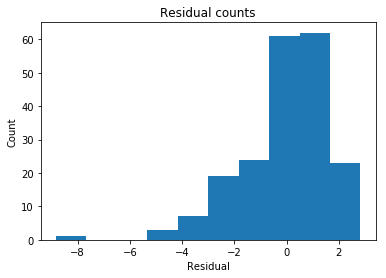

In [3]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

#Multi-variate normality
# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

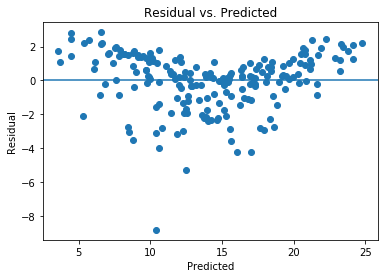

In [4]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [5]:
data_mvFix = data
data_mvFix.count()

Unnamed: 0    200
TV            200
Radio         200
Newspaper     200
Sales         200
dtype: int64

In [6]:
data_mvFix.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000,200.000,200.000,200.000,200.000
mean,100.500,147.042,23.264,30.554,14.023
std,57.879,85.854,14.847,21.779,5.217
min,1.000,0.700,0.000,0.300,1.600
25%,50.750,74.375,9.975,12.750,10.375
50%,100.500,149.750,22.900,25.750,12.900
75%,150.250,218.825,36.525,45.100,17.400
max,200.000,296.400,49.600,114.000,27.000


In [7]:
data_mvFix.query('Radio == 0').count()

Unnamed: 0    1
TV            1
Radio         1
Newspaper     1
Sales         1
dtype: int64

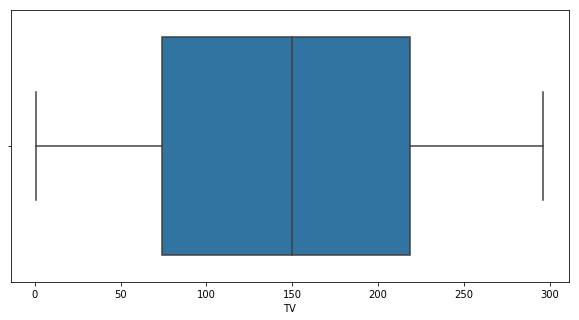

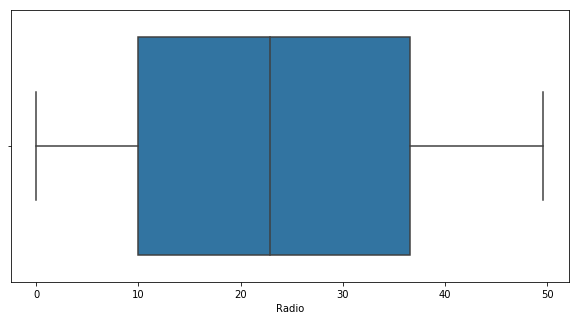

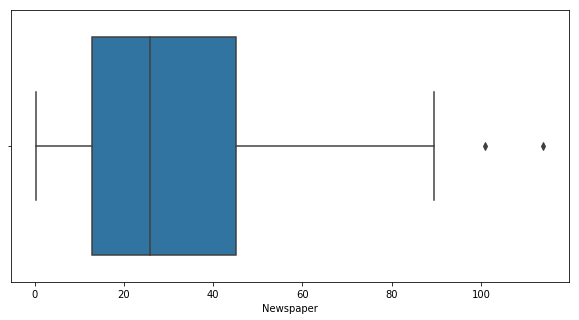

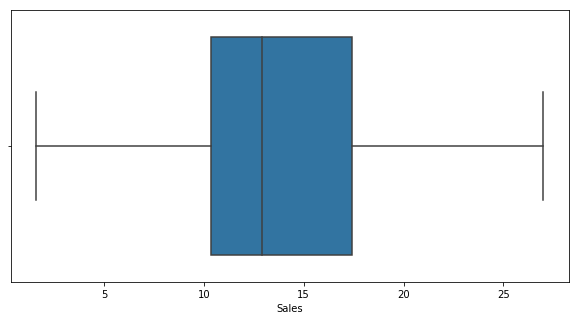

In [8]:
plt.subplots(figsize=(10,5))
sns.boxplot(x=data_mvFix["TV"])

plt.subplots(figsize=(10,5))
sns.boxplot(x=data_mvFix["Radio"])

plt.subplots(figsize=(10,5))
sns.boxplot(x=data_mvFix["Newspaper"])

plt.subplots(figsize=(10,5))
sns.boxplot(x=data_mvFix["Sales"])

In [9]:
data_mvFix = data_mvFix.query('Newspaper < 60 and Radio != 0')
data_mvFix.count()

Unnamed: 0    180
TV            180
Radio         180
Newspaper     180
Sales         180
dtype: int64

In [10]:
data_mvFix.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,180.000,180.000,180.000,180.000,180.000
mean,101.506,146.855,22.036,25.922,13.798
std,57.645,84.256,14.531,16.424,5.054
min,2.000,0.700,0.300,0.300,1.600
25%,50.750,75.000,9.300,11.450,10.375
50%,102.000,149.750,20.750,23.300,12.850
75%,152.250,217.875,33.500,38.075,17.225
max,200.000,293.600,49.600,59.700,27.000


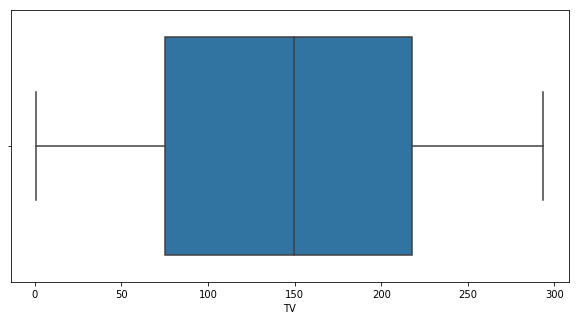

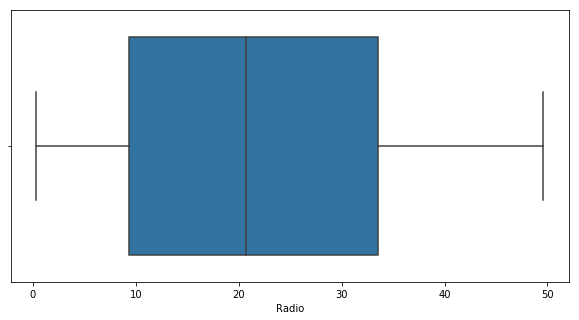

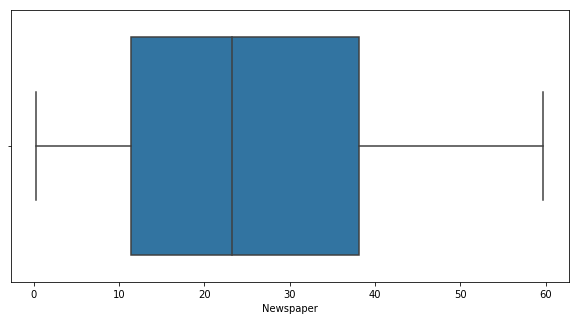

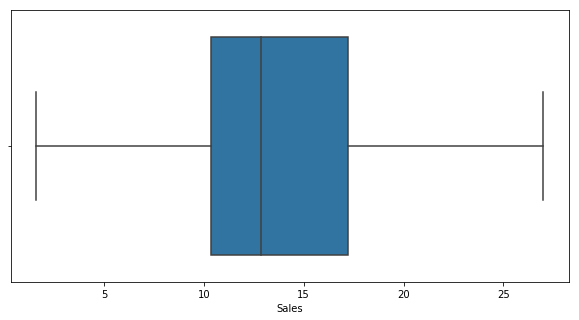

In [11]:
plt.subplots(figsize=(10,5))
sns.boxplot(x=data_mvFix["TV"])

plt.subplots(figsize=(10,5))
sns.boxplot(x=data_mvFix["Radio"])

plt.subplots(figsize=(10,5))
sns.boxplot(x=data_mvFix["Newspaper"])

plt.subplots(figsize=(10,5))
sns.boxplot(x=data_mvFix["Sales"])

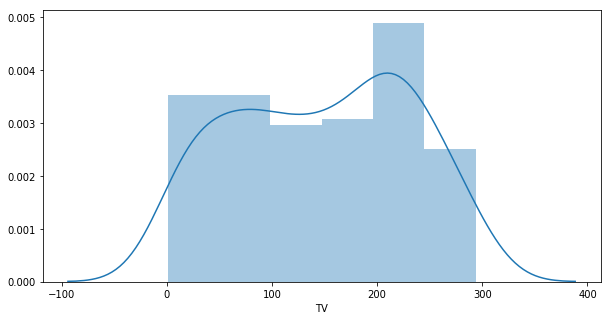

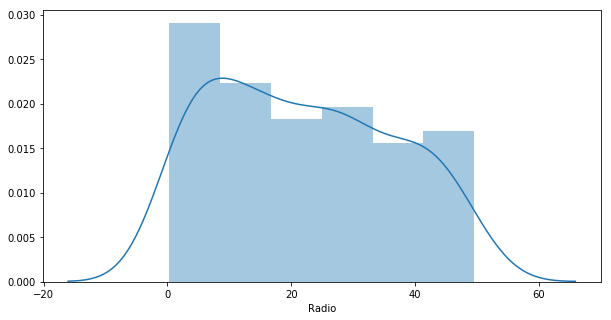

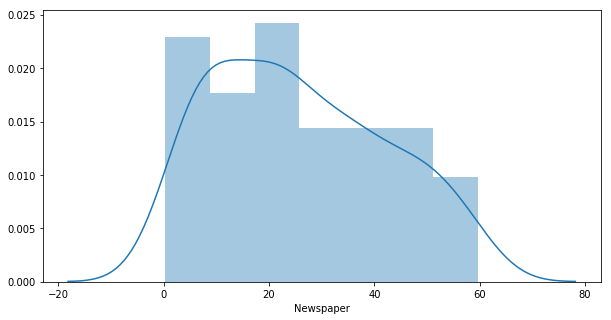

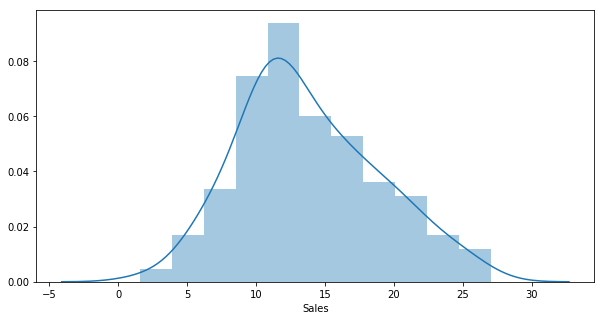

In [12]:
plt.subplots(figsize=(10,5))
sns.distplot(data_mvFix["TV"])

plt.subplots(figsize=(10,5))
sns.distplot(data_mvFix["Radio"])

plt.subplots(figsize=(10,5))
sns.distplot(data_mvFix["Newspaper"])

plt.subplots(figsize=(10,5))
sns.distplot(data_mvFix["Sales"])


Coefficients: 
 [[0.04374526 0.19011088 0.00640585]]

Intercept: 
 [3.01876896]

R-squared:
0.8972655282133962


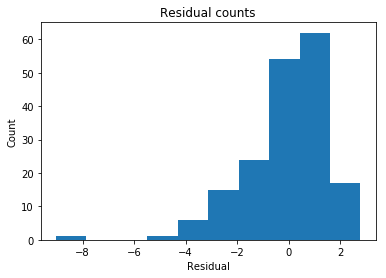

In [13]:
# Instantiate and fit our model.
regr1 = linear_model.LinearRegression()
Y1 = data_mvFix['Sales'].values.reshape(-1, 1)
X1 = data_mvFix[['TV','Radio','Newspaper']]
regr1.fit(X1, Y1)

# Inspect the results.
print('\nCoefficients: \n', regr1.coef_)
print('\nIntercept: \n', regr1.intercept_)
print('\nR-squared:')
print(regr1.score(X1, Y1))

# Extract predicted values.
predicted1 = regr1.predict(X1).ravel()
actual1 = data_mvFix['Sales']

#Multi-variate normality
# Calculate the error, also called the residual.
residual1 = actual1 - predicted1

# This looks a bit concerning.
plt.hist(residual1)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

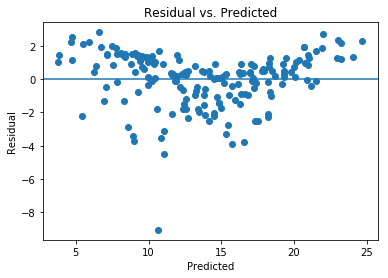

In [14]:
plt.scatter(predicted1, residual1)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

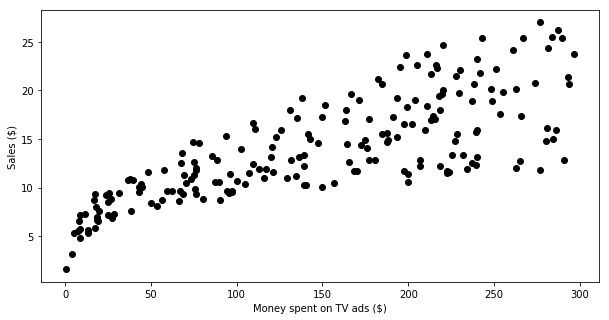

In [17]:
plt.figure(figsize=(10,5))
plt.scatter(
    data['TV'],
    data['Sales'],
    c='black'
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [20]:
X = data['TV'].values.reshape(-1,1)
y = data['Sales'].values.reshape(-1,1)
reg = linear_model.LinearRegression()
reg.fit(X, y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Y = 7.0326 + 0.047537X


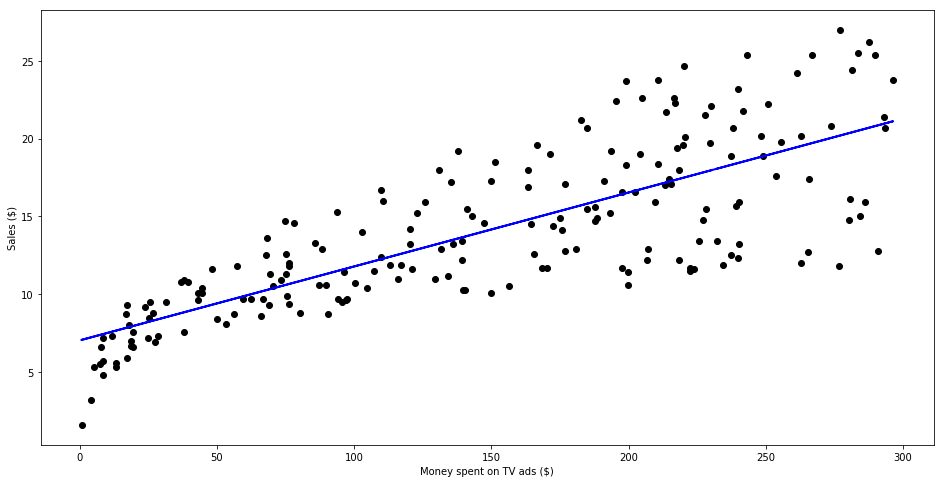

In [21]:
predictions = reg.predict(X)
plt.figure(figsize=(16, 8))
plt.scatter(
    data['TV'],
    data['Sales'],
    c='black'
)
plt.plot(
    data['TV'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [23]:
import statsmodels.api as sm
X = data['TV']
y = data['Sales']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 19 Jun 2019   Prob (F-statistic):           1.47e-42
Time:                        23:44:30   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

c:\users\niranjan\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [27]:
#Multiple Linear Regression
Xs = data.drop(['Sales', 'Unnamed: 0'], axis=1)
y = data['Sales'].values.reshape(-1,1)
reg = linear_model.LinearRegression()
reg.fit(Xs, y)
print("The linear model is: Y = {:.5} + {:.5}*TV + {:.5}*radio + {:.5}*newspaper".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2]))

The linear model is: Y = 2.9389 + 0.045765*TV + 0.18853*radio + -0.0010375*newspaper


In [29]:
X = np.column_stack((data['TV'], data['Radio'], data['Newspaper']))
y = data['Sales']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 19 Jun 2019   Prob (F-statistic):           1.58e-96
Time:                        23:48:18   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0